In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pytides.tide import Tide
from datetime import datetime

Here, the data from the Nain tide gauge is loaded:

In [2]:
Nain_gauge = pd.read_csv('h833a.csv', parse_dates=True)
Nain_gauge.head()

,year,month,day,hour,height
0,1963,10,17,5,530
1,1963,10,17,6,650
2,1963,10,17,7,970
3,1963,10,17,8,1380
4,1963,10,17,9,1870


Here, the missing values are replaced with NaN:

In [3]:
Nain_gauge = Nain_gauge.replace(-32767, np.NaN)

The mean observed water level is calculated. That value is then subtracted from each observation of water level in the dataset:

In [4]:
demeaned = Nain_gauge['height'] - Nain_gauge['height'].mean()
Nain_gauge['height_corr'] = demeaned

This is a list of index values that correspond to the beginning of a continuous year-long record of water level observations, and the row number of the measurement that occurs exactly one year later:

[1965: (16896, 25656),
 1967: (29856, 38616),
 1970: (60984, 69744),
 1971: (71352, 80112),
 2001: (332821, 341581),
 2010: (411838, 420598),
2014: (446492, 455252),
 2015: (455663, 464423),
 2016: (464424, 473184),
 2017 (473185, 481945)]

Here, the **eighth** pair of index values is used to slice the Nain gauge DataFrame into a one-year long record:

In [5]:
year15 = Nain_gauge.loc[455663:464423, :].reset_index(drop=True)

That data is visualized:

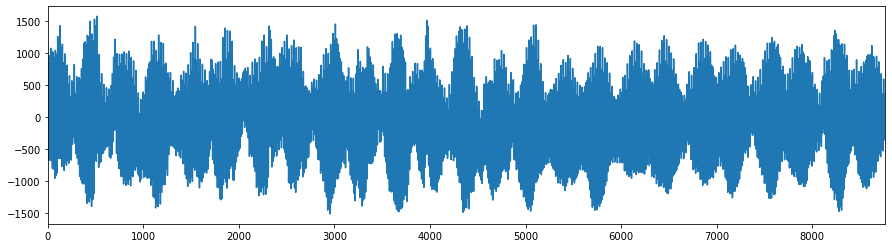

In [6]:
ax =  year15['height_corr'].plot(figsize=(15,4))

The first measurement in that record is defined as a datetime object called "t0":

In [7]:
t0 = datetime(year15.loc[0,'year'], year15.loc[0,'month'], year15.loc[0,'day'], year15.loc[0,'hour'])
t0

datetime.datetime(2015, 10, 10, 4, 0)

A one-year-long array of hours is generated:

In [8]:
hours = 0.1*np.arange(365 * 24)

An array of datetime objects, beginning at "t0" and of equal length to one-year's worth of hours, is generated:

In [9]:
times = Tide._times(t0, hours)
len(times)

8760

The tidal decomposition function from pytides is applied to the year of water level observations:

In [10]:
tide_15 = Tide.decompose(year15['height_corr'], times)

An array of water level over one year is generated for the data:

In [11]:
tide_model = tide_15.at(times)

The tidal model is plotted:

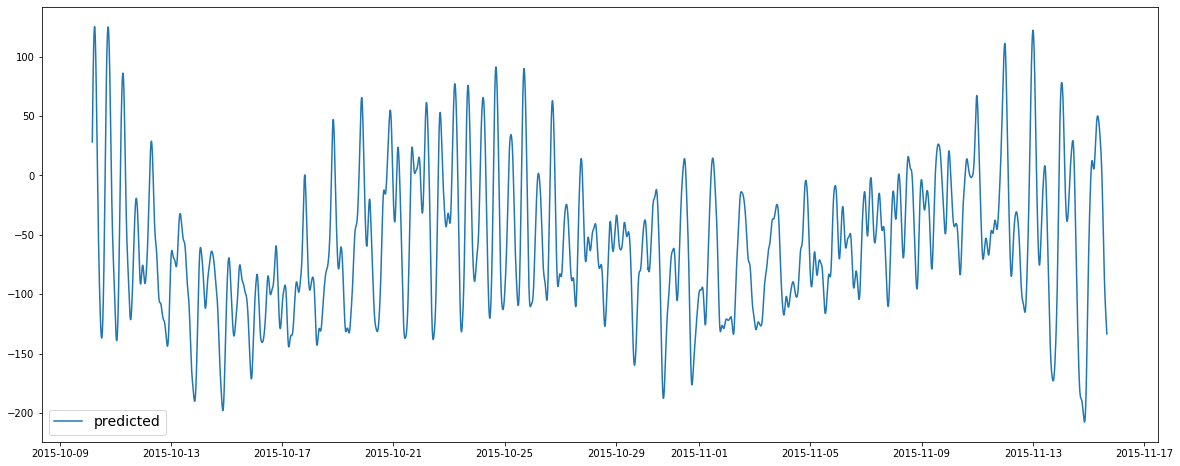

In [12]:
fig, ax = plt.subplots(figsize=(20,8))

# plot the model
ax.plot(times, tide_model, label='predicted')

ax.legend(fontsize=14)

plt.show()

The tidal consituents calculated by pytides are added to a new DataFrame:

In [13]:
constituent = [c.name for c in tide_15.model['constituent']]

In [14]:
year15_components = pd.DataFrame(tide_15.model, index=constituent).drop('constituent', axis=1)

The tidal amplitude is converted to meters and added to the DataFrame:

In [15]:
year15_components['amplitude (m)'] = year15_components['amplitude']/1000

The largest 10 tidal components are displayed:

In [16]:
year15_components.sort_values('amplitude', ascending=False).head(10)

,amplitude,phase,amplitude (m)
S1,3424.442859,342.598620,3.424443
R2,1913.590735,113.485045,1.913591
K1,1904.052196,288.761319,1.904052
P1,1789.206269,36.136877,1.789206
K2,1696.878680,246.030976,1.696879
T2,1248.459240,238.716631,1.248459
L2,593.128327,200.126440,0.593128
S2,561.379286,326.127428,0.561379
lambda2,447.652867,325.430801,0.447653
Q1,168.336922,28.564579,0.168337


In [17]:
year15_components.to_csv('ComponentsAmplitude_2015.csv')